<a href="https://colab.research.google.com/github/toddwalters/pgaiml-python-coding-examples/blob/main/advanced-deep-learning-computer-vision/d3/lane%20detection/Lane_Detection_using_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/datasets/advDLandCV/d3/Highway.jpg'

# Lane Detection using OpenCV

## Step 1: Importing All Necessary Packages
- Import the Python package cv2, which is used for computer vision and image processing
- Import the Python package NumPy, which manages arrays
- Import the Python package matplotlib, which sets the padding between and around the subplots as well as the figure size

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def to_rgb(image):
    return(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## Step 2: Reading an Image
- Read and display the image

In [ ]:
image = cv2.imread(file_path)

plt.imshow(to_rgb(image))
plt.show()

## Step 3: Processing Image
- Convert the image to grayscale
- Apply Gaussian blur to the grayscale image
- Display the processed image



In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (11,11), 0)
plt.imshow(gray)
# plt.imshow(to_rgb(gray))
# plt.show()

**Observation**

The image is converted to grayscale and displayed.

## Step 4: Detecting Edges with Canny
- Detect edges using Canny edge detection
- Display the edges

In [ ]:
edges = cv2.Canny(gray, 50, 200)
plt.imshow(edges)
plt.show()

**Observation**

The edges in the image are detected and displayed.


## Step 5: Applying Hough Transform
- Detect lines using the Hough transform
- Iterate over each line detected
- Get the endpoints of the line and filter outlines at the top of the image
- Draw the filtered lines on the original image
- Display the modified image



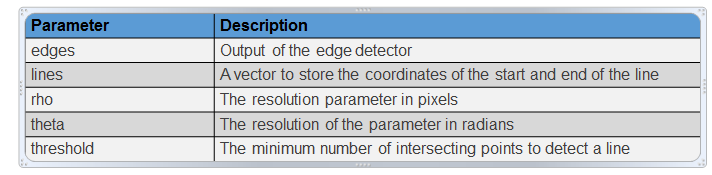

In [ ]:
# edges: output of the edge detector
# Lines: Coordinates of start and end of the line
# rho: Resolution parameter in pixel
# theta: Resolution parameter in radians
# threshold: min number of intersecting points to detect line

lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold = 100, minLineLength=5, maxLineGap=250)


In [ ]:
lines[0]

In [ ]:
lines_copy = lines.copy()
lines_copy_tmp = lines_copy.copy()

In [ ]:
for line in lines:
    x1, y1, x2, y2 = line[0]
    # if (y1 > 4000 or y2 > 4000): #Filter out the lines in the top of the image
    if (y1 > 4000 or y2 > 4000):
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 3)

In [ ]:
plt.imshow(to_rgb(image))
plt.show()

**Observation**

The code detects lines in the image and displays them for visualization.